In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn import preprocessing
from apyori import apriori

In [52]:
data =  pd.read_csv("Groceries_dataset.csv")

In [53]:
data

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [54]:
data.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [55]:
data.itemDescription

0               tropical fruit
1                   whole milk
2                    pip fruit
3             other vegetables
4                   whole milk
                 ...          
38760            sliced cheese
38761                    candy
38762                 cake bar
38763    fruit/vegetable juice
38764                 cat food
Name: itemDescription, Length: 38765, dtype: object

In [56]:
itemDesc = data.groupby("itemDescription")

In [57]:
itemDesc.corr().head(60)

,,Member_number
itemDescription,,
Instant food products,Member_number,1.0
UHT-milk,Member_number,1.0
abrasive cleaner,Member_number,1.0
artif. sweetener,Member_number,1.0
baby cosmetics,Member_number,1.0
bags,Member_number,1.0
baking powder,Member_number,1.0
bathroom cleaner,Member_number,1.0
beef,Member_number,1.0


In [58]:
itemDesc.max()

,Member_number,Date
itemDescription,,
Instant food products,4981,31-01-2014
UHT-milk,4993,31-08-2014
abrasive cleaner,4993,28-03-2014
artif. sweetener,4975,30-08-2014
baby cosmetics,4759,20-02-2015
...,...,...
white bread,4989,31-07-2014
white wine,4997,31-10-2014
whole milk,4997,31-10-2015


In [59]:
data.value_counts("itemDescription").head(60)

itemDescription
whole milk                  2502
other vegetables            1898
rolls/buns                  1716
soda                        1514
yogurt                      1334
root vegetables             1071
tropical fruit              1032
bottled water                933
sausage                      924
citrus fruit                 812
pastry                       785
pip fruit                    744
shopping bags                731
canned beer                  717
bottled beer                 687
whipped/sour cream           662
newspapers                   596
frankfurter                  580
brown bread                  571
domestic eggs                566
pork                         566
butter                       534
fruit/vegetable juice        518
beef                         516
curd                         514
margarine                    491
coffee                       476
frozen vegetables            425
chicken                      422
white bread                

In [60]:
data.value_counts("itemDescription").count()

167

In [61]:
data.value_counts("itemDescription").mean()

232.125748502994

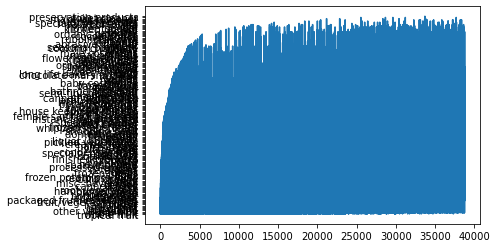

In [62]:
plt.plot(data["itemDescription"])

(array([13283.,  8093.,  5048.,  3187.,  4537.,  1123.,  1402.,  1069.,
          609.,   414.]),
 array([  0. ,  16.6,  33.2,  49.8,  66.4,  83. ,  99.6, 116.2, 132.8,
        149.4, 166. ]),
 <BarContainer object of 10 artists>)

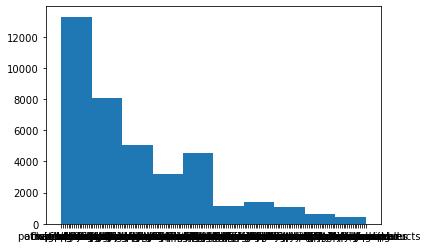

In [63]:
plt.hist(data["itemDescription"])

Text(0, 0.5, 'Member_number')

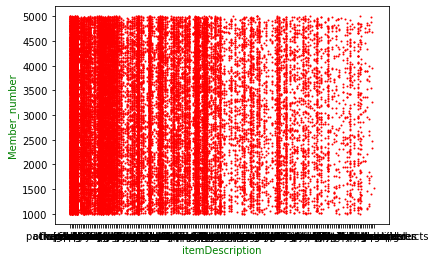

In [64]:
plt.scatter("itemDescription", 'Member_number', c="r", s = 1, data=data)
plt.xlabel("itemDescription", c="g")
plt.ylabel("Member_number", c="g")

In [65]:
data.itemDescription.value_counts().sort_index().head(60)

Instant food products        60
UHT-milk                    323
abrasive cleaner             22
artif. sweetener             29
baby cosmetics                3
bags                          4
baking powder               122
bathroom cleaner             17
beef                        516
berries                     327
beverages                   251
bottled beer                687
bottled water               933
brandy                       38
brown bread                 571
butter                      534
butter milk                 263
cake bar                     93
candles                      66
candy                       219
canned beer                 717
canned fish                 116
canned fruit                 21
canned vegetables            82
cat food                    177
cereals                      42
chewing gum                 181
chicken                     422
chocolate                   357
chocolate marshmallow        60
citrus fruit                812
cleaner 

In [66]:
least = data.itemDescription.value_counts().tail(20).sort_values()

In [67]:
least

preservation products     1
kitchen utensil           1
baby cosmetics            3
bags                      4
rubbing alcohol           5
make up remover           5
frozen chicken            5
toilet cleaner            5
salad dressing            6
whisky                    8
decalcifier               9
hair spray                9
liqueur                   9
organic products         10
specialty vegetables     11
frozen fruits            11
cream                    12
honey                    13
ready soups              15
cooking chocolate        15
Name: itemDescription, dtype: int64

Text(0.5, 1.0, 'Twenty product that sold least')

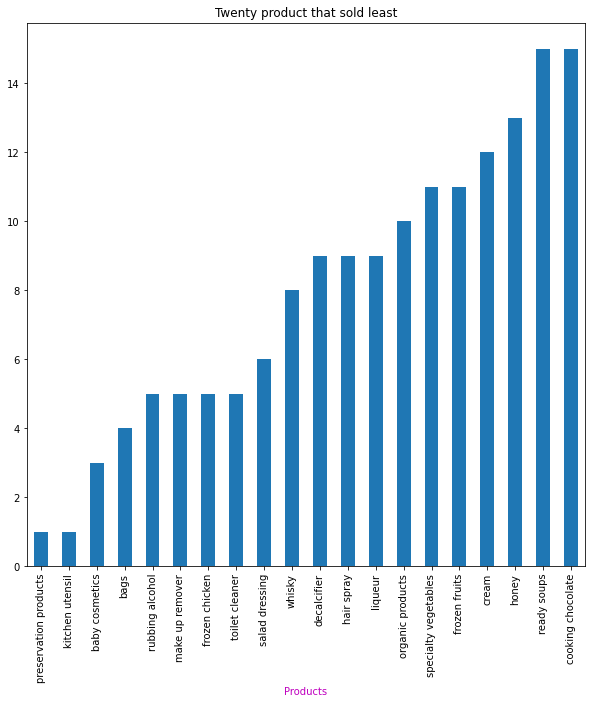

In [68]:
plt.figure(figsize = (10,10))
least.plot.bar()
plt.xlabel("Products", c ="m")
plt.title("Twenty product that sold least")

In [69]:
least.tail()

frozen fruits        11
cream                12
honey                13
ready soups          15
cooking chocolate    15
Name: itemDescription, dtype: int64

In [70]:
highest = data.itemDescription.value_counts().head(20).sort_values()

In [71]:
highest

pork                   566
brown bread            571
frankfurter            580
newspapers             596
whipped/sour cream     662
bottled beer           687
canned beer            717
shopping bags          731
pip fruit              744
pastry                 785
citrus fruit           812
sausage                924
bottled water          933
tropical fruit        1032
root vegetables       1071
yogurt                1334
soda                  1514
rolls/buns            1716
other vegetables      1898
whole milk            2502
Name: itemDescription, dtype: int64

Text(0.5, 1.0, 'Twenty product that sold highest')

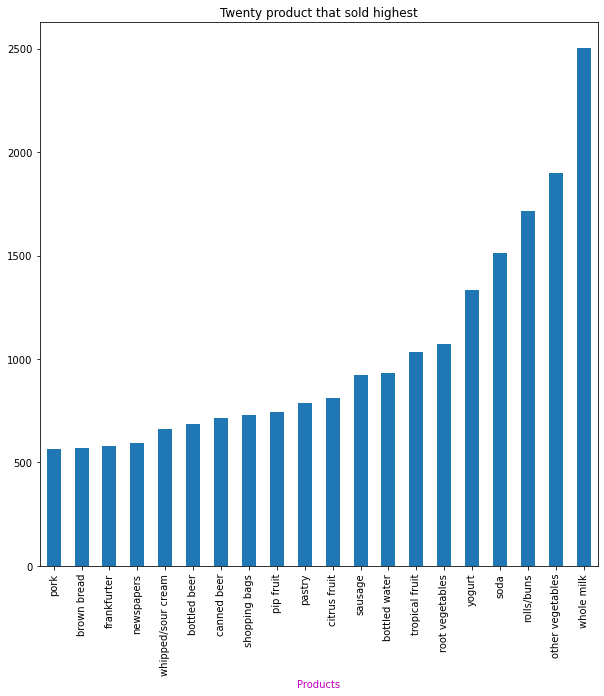

In [72]:
plt.figure(figsize = (10,10))
highest.plot.bar()
plt.xlabel("Products", c ="m")
plt.title("Twenty product that sold highest")

In [73]:
customer = data.Member_number.value_counts().head(20)

Text(0.5, 0, 'Customers')

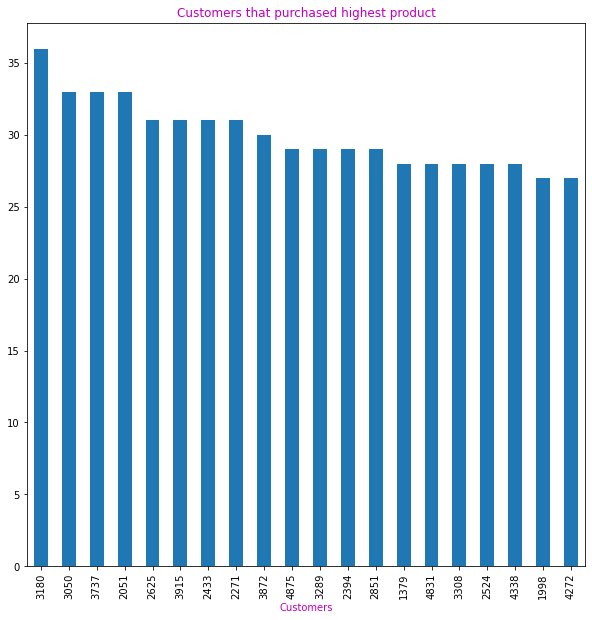

In [74]:
plt.figure(figsize = (10,10))
customer.plot.bar()
plt.title("Customers that purchased highest product", c="m")
plt.xlabel("Customers",  c="m")

In [75]:
date = data.groupby("Date")

In [76]:
data.groupby(['Date'])['itemDescription'].value_counts().sort_index().head(60)

Date        itemDescription       
01-01-2014  Instant food products     2
            berries                   1
            bottled beer              1
            bottled water             4
            brown bread               1
            butter                    1
            candles                   1
            chocolate                 1
            citrus fruit              1
            cleaner                   1
            coffee                    1
            curd                      1
            dishes                    1
            domestic eggs             1
            flower (seeds)            1
            frozen potato products    1
            frozen vegetables         3
            hamburger meat            3
            onions                    1
            other vegetables          3
            sausage                   1
            shopping bags             2
            sliced cheese             1
            soda                      2
     

In [77]:
data1 = pd.get_dummies(data['itemDescription'])

In [78]:
data1.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [79]:
data1 = pd.get_dummies(data['itemDescription'])

In [80]:
data1

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38760,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38761,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38762,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38763,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
data

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [82]:
data1.shape

(38765, 167)

In [83]:
data1

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38760,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38761,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38762,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38763,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
l = data.iloc[:,0:2]

In [85]:
l.shape

(38765, 2)

In [86]:
datas = pd.concat([l, data1], axis = 1)

In [87]:
datas

,Member_number,Date,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1808,21-07-2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2552,05-01-2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2300,19-09-2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1187,12-12-2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3037,01-02-2015,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38760,4471,08-10-2014,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38761,2022,23-02-2014,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38762,1097,16-04-2014,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38763,1510,03-12-2014,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
products = data['itemDescription'].unique()


In [89]:
products

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

In [90]:
datam = datas.groupby(['Member_number', 'Date'])[products[:]].sum()


In [91]:
datam

tropical fruit  whole milk  pip fruit  \
Member_number Date                                                
1000          15-03-2015               0           1          0   
              24-06-2014               0           1          0   
              24-07-2015               0           0          0   
              25-11-2015               0           0          0   
              27-05-2015               0           0          0   
...                                  ...         ...        ...   
4999          24-01-2015               1           0          0   
              26-12-2015               0           0          0   
5000          09-03-2014               0           0          0   
              10-02-2015               0           0          0   
              16-11-2014               0           0          0   

                          other vegetables  rolls/buns  pot plants  \
Member_number Date                                                   
1000          15-03-2015                 0           0           0   
              24-06-2014                 0           0           0   
              24-07-2015                 0           0           0   
              25-11-2015                 0           0           0   
              27-05-2015                 0           0           0   
...                                    ...         ...         ...   
4999          24-01-2015                 1           0           0   
              26-12-2015                 0           0           0   
5000          09-03-2014                 0           0           0   
              10-02-2015                 0           0           0   
              16-11-2014                 1           0           0   

                          citrus fruit  beef  frankfurter  chicken  ...  \
Member_number Date                                                  ...   
1000          15-03-2015             0     0            0        0  ...   
              24-06-2014             0     0            0        0  ...   
              24-07-2015             0     0            0        0  ...   
              25-11-2015             0     0            0        0  ...   
              27-05-2015             0     0            0        0  ...   
...                                ...   ...          ...      ...  ...   
4999          24-01-2015             0     0            0        0  ...   
              26-12-2015             0     0            0        0  ...   
5000          09-03-2014             0     0            0        0  ...   
              10-02-2015             0     0            0        0  ...   
              16-11-2014             0     0            0        0  ...   

                          flower (seeds)  rice  tea  salad dressing  \
Member_number Date                                                    
1000          15-03-2015               0     0    0               0   
              24-06-2014               0     0    0               0   
              24-07-2015               0     0    0               0   
              25-11-2015               0     0    0               0   
              27-05-2015               0     0    0               0   
...                                  ...   ...  ...             ...   
4999          24-01-2015               0     0    0               0   
              26-12-2015               0     0    0               0   
5000          09-03-2014               0     0    0               0   
              10-02-2015               0     0    0               0   
              16-11-2014               0     0    0               0   

                          specialty vegetables  pudding powder  ready soups  \
Member_number Date                                                            
1000          15-03-2015                     0               0            0   
              24-06-2014                     0               0            0   
              24-07-2015   

In [92]:
datam.head()

tropical fruit  whole milk  pip fruit  \
Member_number Date                                                
1000          15-03-2015               0           1          0   
              24-06-2014               0           1          0   
              24-07-2015               0           0          0   
              25-11-2015               0           0          0   
              27-05-2015               0           0          0   

                          other vegetables  rolls/buns  pot plants  \
Member_number Date                                                   
1000          15-03-2015                 0           0           0   
              24-06-2014                 0           0           0   
              24-07-2015                 0           0           0   
              25-11-2015                 0           0           0   
              27-05-2015                 0           0           0   

                          citrus fruit  beef  frankfurter  chicken  ...  \
Member_number Date                                                  ...   
1000          15-03-2015             0     0            0        0  ...   
              24-06-2014             0     0            0        0  ...   
              24-07-2015             0     0            0        0  ...   
              25-11-2015             0     0            0        0  ...   
              27-05-2015             0     0            0        0  ...   

                          flower (seeds)  rice  tea  salad dressing  \
Member_number Date                                                    
1000          15-03-2015               0     0    0               0   
              24-06-2014               0     0    0               0   
              24-07-2015               0     0    0               0   
              25-11-2015               0     0    0               0   
              27-05-2015               0     0    0               0   

                          specialty vegetables  pudding powder  ready soups  \
Member_number Date                                                            
1000          15-03-2015                     0               0            0   
              24-06-2014                     0               0            0   
              24-07-2015                     0               0            0   
              25-11-2015                     0               0            0   
              27-05-2015                     0               0            0   

                          make up remover  toilet cleaner  \
Member_number Date                                          
1000          15-03-2015                0               0   
              24-06-2014                0               0   
              24-07-2015                0               0   
              25-11-2015                0               0   
              27-05-2015                0               0   

                          preservation products  
Member_number Date                               
1000          15-03-2015                      0  
              24-06-2014                      0  
              24-07-2015                      0  
              25-11-2015                      0  
              27-05-2015                      0  

[5 rows x 167 columns]

In [93]:
myData = datam.reset_index()[products]


In [94]:
myData

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
def myFunct(x):
    for i in products:
        if x[i] > 0:
            x[i] = i
    return x
myData1 = myData.apply(myFunct, axis=1)
myData1.head()

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
myList= myData1.values.tolist()
myList[1]

[0,
 'whole milk',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 'pastry',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 'salty snack',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [97]:
myList1=[]
for x in myList:
    myList1.append([i for i in x if i != 0])

In [98]:
myList1

[['whole milk', 'yogurt', 'sausage', 'semi-finished bread'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['whole milk', 'rolls/buns', 'sausage'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['other vegetables', 'frozen vegetables'],
 ['whole milk', 'butter'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['rolls/buns', 'sausage'],
 ['root vegetables', 'detergent'],
 ['frozen meals', 'dental care'],
 ['rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['other vegetables', 'hygiene articles'],
 ['tropical fruit', 'whole milk', 'pip fruit'],
 ['rolls/buns', 'chocolate', 'red/blush wine'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'rolls/buns', 'packaged fruit/vegetables', 'chocolate'],
 ['whole milk', 'root vegetables', 'pastry'],
 

In [99]:
kurallar = apriori(myList1,min_support=0.0004,min_confidance=0.2,min_lift=3, min_lenght =2)
apriorirules = list(kurallar)

In [100]:
print(apriorirules)

[RelationRecord(items=frozenset({'liver loaf', 'fruit/vegetable juice'}), support=0.00040098910646260775, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fruit/vegetable juice'}), items_add=frozenset({'liver loaf'}), confidence=0.011787819253438114, lift=3.52762278978389), OrderedStatistic(items_base=frozenset({'liver loaf'}), items_add=frozenset({'fruit/vegetable juice'}), confidence=0.12, lift=3.5276227897838903)]), RelationRecord(items=frozenset({'ham', 'pickled vegetables'}), support=0.0005346521419501437, ordered_statistics=[OrderedStatistic(items_base=frozenset({'ham'}), items_add=frozenset({'pickled vegetables'}), confidence=0.03125, lift=3.4895055970149254), OrderedStatistic(items_base=frozenset({'pickled vegetables'}), items_add=frozenset({'ham'}), confidence=0.05970149253731344, lift=3.4895055970149254)]), RelationRecord(items=frozenset({'sugar', 'spread cheese'}), support=0.00040098910646260775, ordered_statistics=[OrderedStatistic(items_base=frozenset({'spread c